# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset     :   https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction

Description :   https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

## Objective : 

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:

- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

---
# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
#import libraries column
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
import pickle

---
# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [2]:
#Data Loading 
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.head(5)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#show tail data
df.tail(5)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,129879,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,2,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [4]:
# copy df keeping original data safe
df_copy = df.copy()

In [5]:
# view the data distribution
df_copy.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# show missing value count per column 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

There is null data ini arrival delay in minutes, seeing from the null data size is small (0.3%, the trimming method can be used if the column use.)

---
# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

Target : satisfaction

In [7]:
#copy df untuk EDA
df_EDA = df_copy.copy()

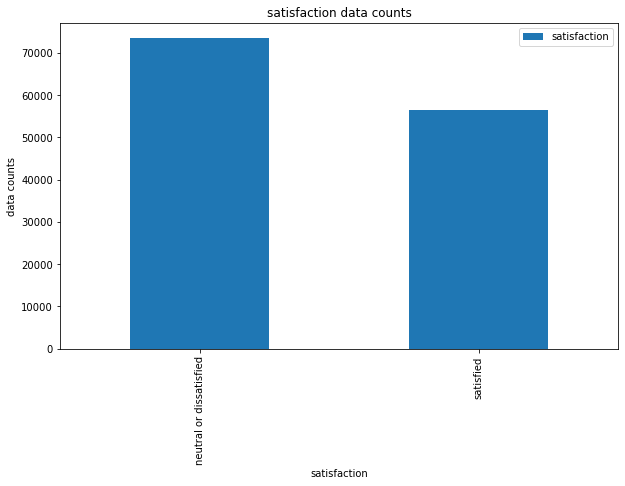

In [8]:
#groupby satisfaction
df_EDA.groupby(["satisfaction"])[["satisfaction"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('satisfaction') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('satisfaction data counts') # add title to the plot

plt.show()

In [9]:
df_EDA.groupby(["satisfaction"])[["satisfaction"]].count()

,satisfaction
satisfaction,
neutral or dissatisfied,73452
satisfied,56428


Dari grafik dan tabel di atas terlihat bahwa data antara target 1 dan target 2 sedikit tidak seimbang (57% vs 43%), sehingga tidak diperlukan penanganan yang imbalance (smote). Lanjutkan dengan EDA semua kolom untuk mengetahui kolom mana yang penting.

In [10]:
# creating def for proportion calculation
def make_dataplot_proportion(df3,grdf):
    col3 = []
    for i in df3.loc[:,0]:

        try:
            k = pd.Series.item(grdf.loc[i,'neutral or dissatisfied'])
        except KeyError:
            k = 0

        try:
            b = pd.Series.item(grdf.loc[i,'satisfied'])
        except KeyError:
            b=0

        try:
            col3.append(b/(b+k))
        except ZeroDivisionError:
            col3.append(0)
        
    df3['proportion of satisfied customer'] = col3
    pd.DataFrame(df3)

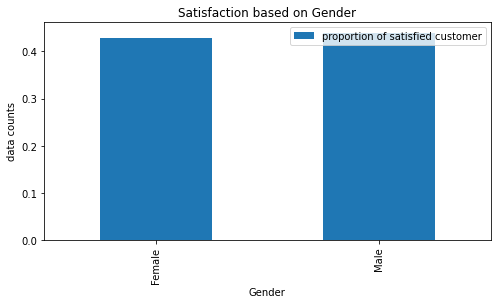

In [11]:
#copy df for EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'Gender'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on Gender') # add title to the plot
plt.show()

Perempuan atau laki-laki memiliki proporsi yang sama dari pelanggan yang puas atas semua data. Artinya kepuasan tidak tergantung pada jenis kelamin pelanggan.

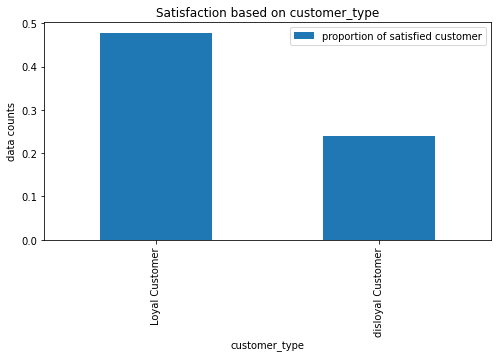

In [12]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'customer_type'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on customer_type') # add title to the plot
plt.show()

Di antara jenis pelanggan, proporsi pelanggan setia dari pelanggan satisfied  atas semua data lebih tinggi daripada pelanggan yang disloyal. Artinya, pelanggan yang  disloyal customer lebih mudah merasa tidak puas terhadap maskapai.

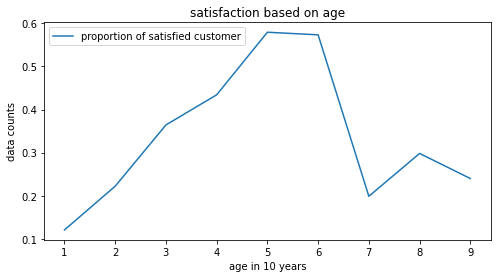

In [13]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'age'
target = 'satisfaction'
df_EDA[i] = np.ceil(df_EDA[i]/10)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(i + ' in 10 years') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('satisfaction based on age') # add title to the plot
plt.show()

Usia 40-60 memiliki satisfaction yang lebih tinggi untuk maskapai, pelanggan yang lebih muda dan lebih tua mungkin membutuhkan lebih banyak layanan untuk satisfied. Yang lebih muda mungkin lebih baik hiburannya, dan yang lebih tua mungkin membutuhkan fitur/layanan yang lebih nyaman. 

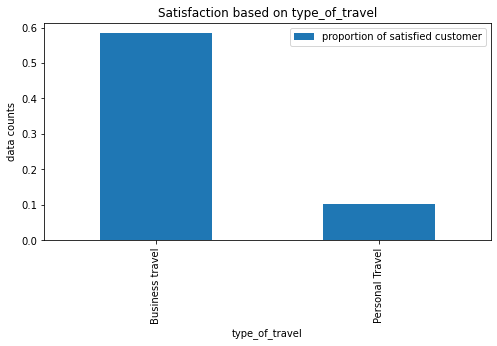

In [14]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'type_of_travel'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on type_of_travel') # add title to the plot
plt.show()

In [15]:
a = df_EDA[(df_EDA['type_of_travel']== 'Business travel')]
a.groupby(['customer_class'])[['customer_class']].count()

,customer_class
customer_class,
Business,59487
Eco,25304
Eco Plus,4902


Perjalanan bisnis memiliki kepuasan yang lebih tinggi daripada perjalanan pribadi, karena sebagian besar (66%) perjalanan bisnis berada di kelas bisnis yang memiliki fasilitas jauh lebih baik daripada ekonomi.

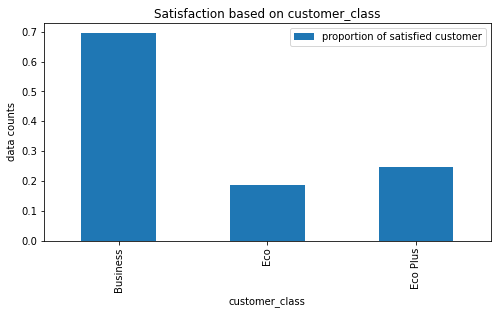

In [16]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'customer_class'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on customer_class') # add title to the plot
plt.show()

Kelas bisnis memiliki tingkat kepuasan pelanggan yang lebih tinggi, hal ini dikarenakan standar kenyamanan, pelayanan dan hiburan yang jauh lebih tinggi dibandingkan dengan perjalanan ekonomi. Oleh karena itu, pelanggan lebih cenderung menikmati penerbangan mereka.

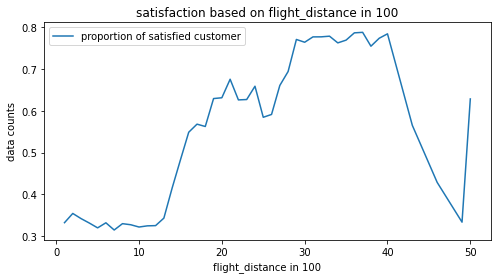

In [17]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'flight_distance'
target = 'satisfaction'
df_EDA[i] = np.ceil(df_EDA[i]/100)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(i + ' in 100') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('satisfaction based on flight_distance in 100') # add title to the plot
plt.show()

Jarak penerbangan pada tahun 2000 - 4000 memiliki kepuasan yang lebih tinggi daripada jarak yang lebih rendah atau lebih tinggi. Mungkin dari jarak tersebut makanan lebih baik (daripada roti, nasi atau lebih banyak makanan diberikan), penutup telinga dan selimut tersedia tetapi dalam jarak yang lebih tinggi dari itu, layanan itu belum cukup.

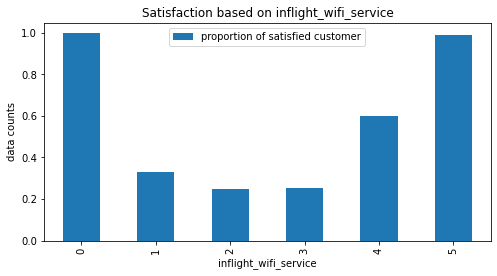

In [18]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'inflight_wifi_service'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on inflight_wifi_service') # add title to the plot
plt.show()

Semakin tinggi kepuasan layanan wifi dalam pesawat, maka semakin tinggi pula kepuasan bagi maskapai.

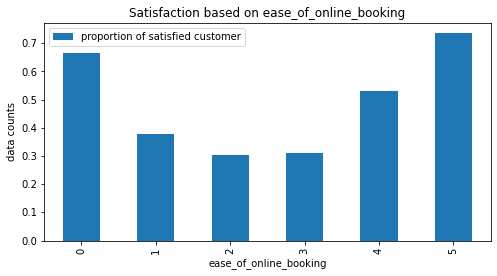

In [19]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'ease_of_online_booking'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on ease_of_online_booking') # add title to the plot
plt.show()

Semakin tinggi kepuasan kemudahan pemesanan online, maka semakin tinggi pula kepuasan bagi maskapai.

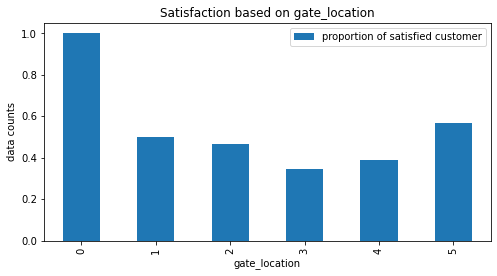

In [20]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'gate_location'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on gate_location') # add title to the plot
plt.show()

Kepuasan pelanggan maskapai tidak dipengaruhi oleh kepuasan lokasi gerbang. Mungkin karena pelanggan tahu bahwa penunjukan gerbang berasal dari manajemen airflow bandara.

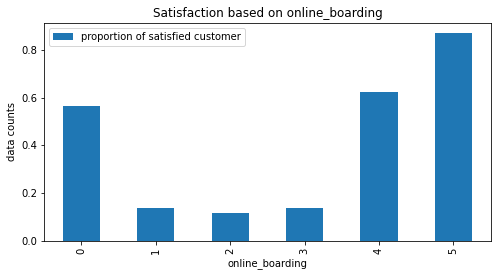

In [21]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'online_boarding'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on online_boarding') # add title to the plot
plt.show()

Semakin tinggi kepuasan kemudahan boarding secara online, maka semakin tinggi pula kepuasan bagi maskapai.

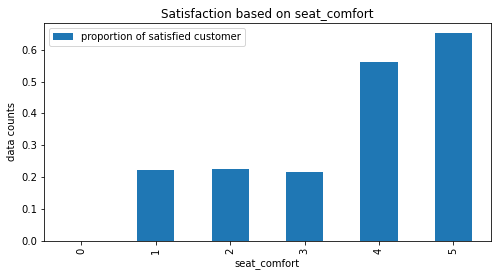

In [22]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'seat_comfort'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on seat_comfort') # add title to the plot
plt.show()

Semakin tinggi kepuasan kenyamanan kursi akan meningkatkan kepuasan pelanggan bagi maskapai.

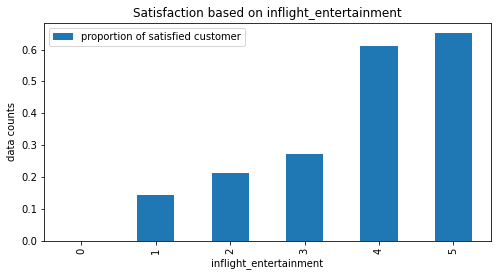

In [23]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'inflight_entertainment'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on inflight_entertainment') # add title to the plot
plt.show()

Semakin tinggi kepuasan hiburan dalam penerbangan akan meningkatkan kepuasan pelanggan bagi maskapai.

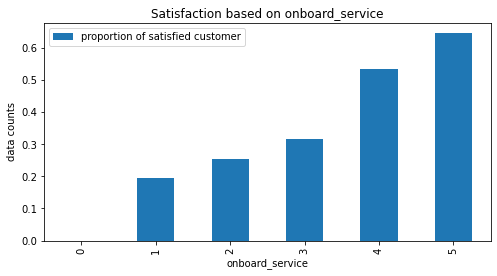

In [24]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'onboard_service'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on onboard_service') # add title to the plot
plt.show()

Semakin tinggi kepuasan layanan onboard, semakin tinggi kepuasan bagi maskapai.

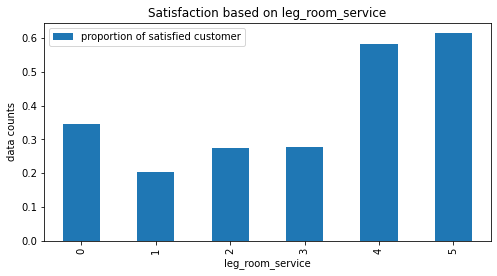

In [25]:
#make plot for i
i = 'leg_room_service'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on leg_room_service') # add title to the plot
plt.show()

Semakin tinggi kepuasan layanan ruang kaki (ruang antara kursi pelanggan dan kursi di depannya), semakin tinggi kepuasan pelanggan bagi maskapai.

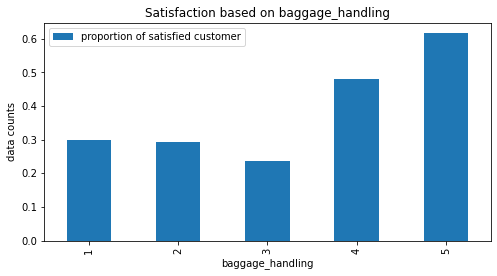

In [26]:
#make plot for i
i = 'baggage_handling'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on baggage_handling') # add title to the plot
plt.show()

Semakin tinggi kepuasan kemudahan penanganan bagasi, maka semakin tinggi pula kepuasan bagi maskapai.

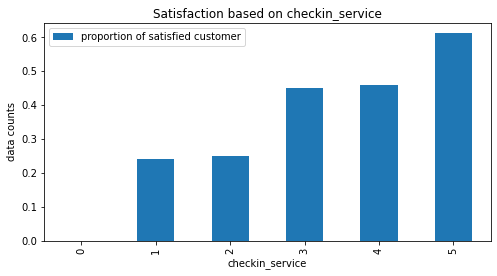

In [27]:
#make plot for i
i = 'checkin_service'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on checkin_service') # add title to the plot
plt.show()

Semakin tinggi kepuasan kemudahan checkin service , maka semakin tinggi pula kepuasan bagi maskapai.

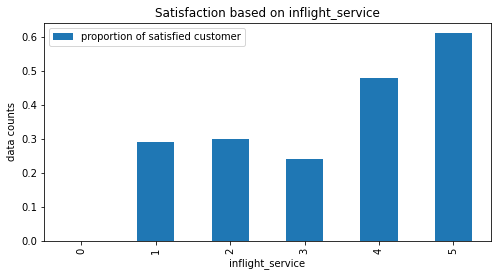

In [28]:
#make plot for i
i = 'inflight_service'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on inflight_service') # add title to the plot
plt.show()

Semakin tinggi kepuasan pelayanan dalam penerbangan, maka semakin tinggi pula kepuasan bagi maskapai.

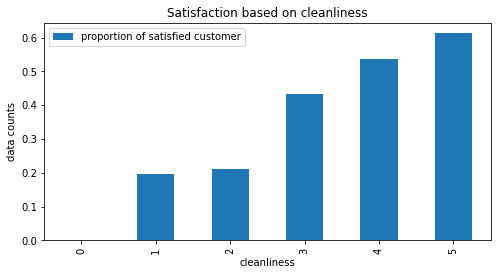

In [29]:
#make plot for i
i = 'cleanliness'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('Satisfaction based on cleanliness') # add title to the plot
plt.show()

Semakin tinggi kepuasan terhadap kebersihan, maka semakin tinggi pula kepuasan bagi maskapai.

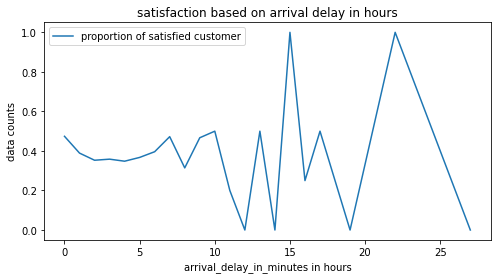

In [30]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'arrival_delay_in_minutes'
target = 'satisfaction'
df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(i + ' in hours') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('satisfaction based on arrival delay in hours') # add title to the plot
plt.show()

In [31]:
a = df_EDA[(df_EDA['arrival_delay_in_minutes'] == 22) | (df_EDA['arrival_delay_in_minutes'] == 15)]
a

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
6744,6744,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,...,3,4,5,4,5,3,5,1305,22.0,satisfied
27732,27732,Male,Loyal Customer,27,Business travel,Business,1746,1,1,4,...,4,3,5,4,5,4,5,859,15.0,satisfied


Proporsi pelanggan yang puas tidak berbeda signifikan antara kepuasan berdasarkan keterlambatan kedatangan dalam jam. Proporsi 1,0 pelanggan yang puas dalam 15 dan 22 menit diabaikan karena hanya 1 data yang tersedia untuk rentang waktu ini dan data tersebut puas dan menyebabkannya sebagai 100% puas.

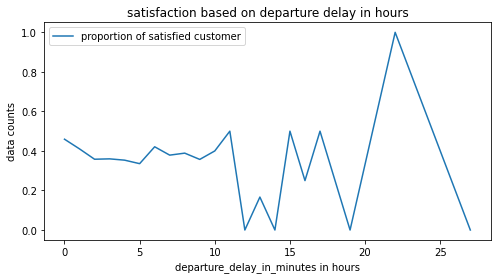

In [32]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'departure_delay_in_minutes'
target = 'satisfaction'
df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='line', figsize=(8, 4))
plt.xlabel(i + ' in hours') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('satisfaction based on departure delay in hours') # add title to the plot
plt.show()

Proporsi pelanggan yang puas tidak berbeda nyata antara kepuasan berdasarkan keterlambatan keberangkatan dalam jam. Oleh karena itu, kepuasan berdasarkan keterlambatan keberangkatan dalam jam tidak mempengaruhi kepuasan pelanggan. Puncaknya dalam 20-25 jam berarti bahwa pelanggan tertunda hingga besok di hampir jam yang sama seperti sebelumnya, mereka akan diberitahui oleh e-announcement dan belum pergi ke bandara. Oleh karena itu kepuasannya lebih tinggi daripada orang yang menunda dari pagi hingga larut malam.

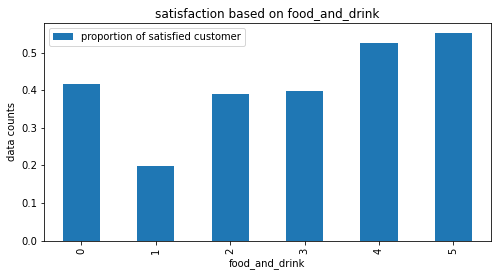

In [33]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'food_and_drink'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i) # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('satisfaction based on food_and_drink') # add title to the plot
plt.show()

Semakin tinggi kepuasan makanan dan minuman, maka semakin tinggi pula kepuasan bagi maskapai. Mungkin disebabkan oleh makanan dan minuman tidak tersedia untuk penerbangan sehingga pelanggan yang terlibat dalam survei tidak dapat menjawab pertanyaan.

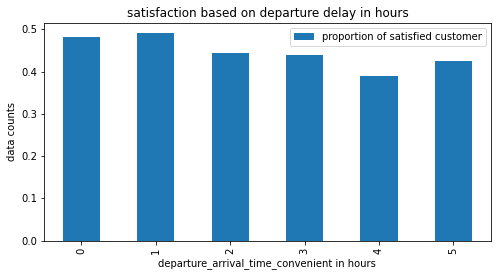

In [34]:
#copy df untuk EDA
df_EDA = df_copy.copy()

#make plot for i
i = 'departure_arrival_time_convenient'
target = 'satisfaction'
# df_EDA[i] = np.ceil(df_EDA[i]/60)

dataunique = pd.DataFrame(df_EDA[i].unique())
gruopeddf = df_EDA.groupby([i,target])[[target]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : i}, inplace=True)
dataunique = dataunique.sort_values(by=i, ascending=True)
dataunique.set_index(i, inplace=True)

dataunique.plot(kind='bar', figsize=(8, 4))
plt.xlabel(i + ' in hours') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('satisfaction based on departure delay in hours') # add title to the plot
plt.show()

Proporsi pelanggan yang puas tidak berbeda nyata antara kategori departure_arrival_time_convenient. Oleh karena itu, departure_arrival_time_convenient tidak mempengaruhi kepuasan pelanggan.

---
# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [35]:
#Get data inference with 30 row sample and lock randomize.
df_inf = df_copy.sample(30, random_state = 15)
df_inf.shape

(30, 24)

In [36]:
# delete row that used by inference
df_trts = df_copy.drop(df_inf.index)

# Check the shape of data after the inference is taken
df_trts.shape

(129850, 24)

In [37]:
# Reset index from the two dataframe
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

## Splitting Dataset, y-X and train-test

In [38]:
#Splitting dataset X adalah feature dan y adalah target
X = df_trts.drop('satisfaction', axis = 1)
y = df_trts['satisfaction']

In [39]:
#Splitting dataset 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [40]:
#Check the train and test shape
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (103880, 23)
Test set size:  (25970, 23)


## Feature Selection

Seleksi Fitur dilakukan pada awal preprocessing data untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pemrosesan data dan menghindari pengolahan data yang tidak terpakai.

In [41]:
#Display X_train to see the features
X_train.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
82098,82117,Male,disloyal Customer,26,Business travel,Eco,539,2,1,2,...,4,4,2,3,2,1,2,4,11,7.0
15128,15133,Female,Loyal Customer,46,Personal Travel,Eco,859,5,5,5,...,4,1,1,5,1,5,1,3,0,4.0
65490,65506,Female,disloyal Customer,18,Business travel,Eco,192,2,0,2,...,2,5,3,5,5,4,5,5,0,0.0
93473,93494,Male,disloyal Customer,24,Business travel,Eco,1140,4,4,4,...,2,3,2,3,4,2,4,2,0,0.0
27114,27122,Male,disloyal Customer,30,Business travel,Business,862,3,3,3,...,1,1,4,2,4,4,4,1,0,0.0


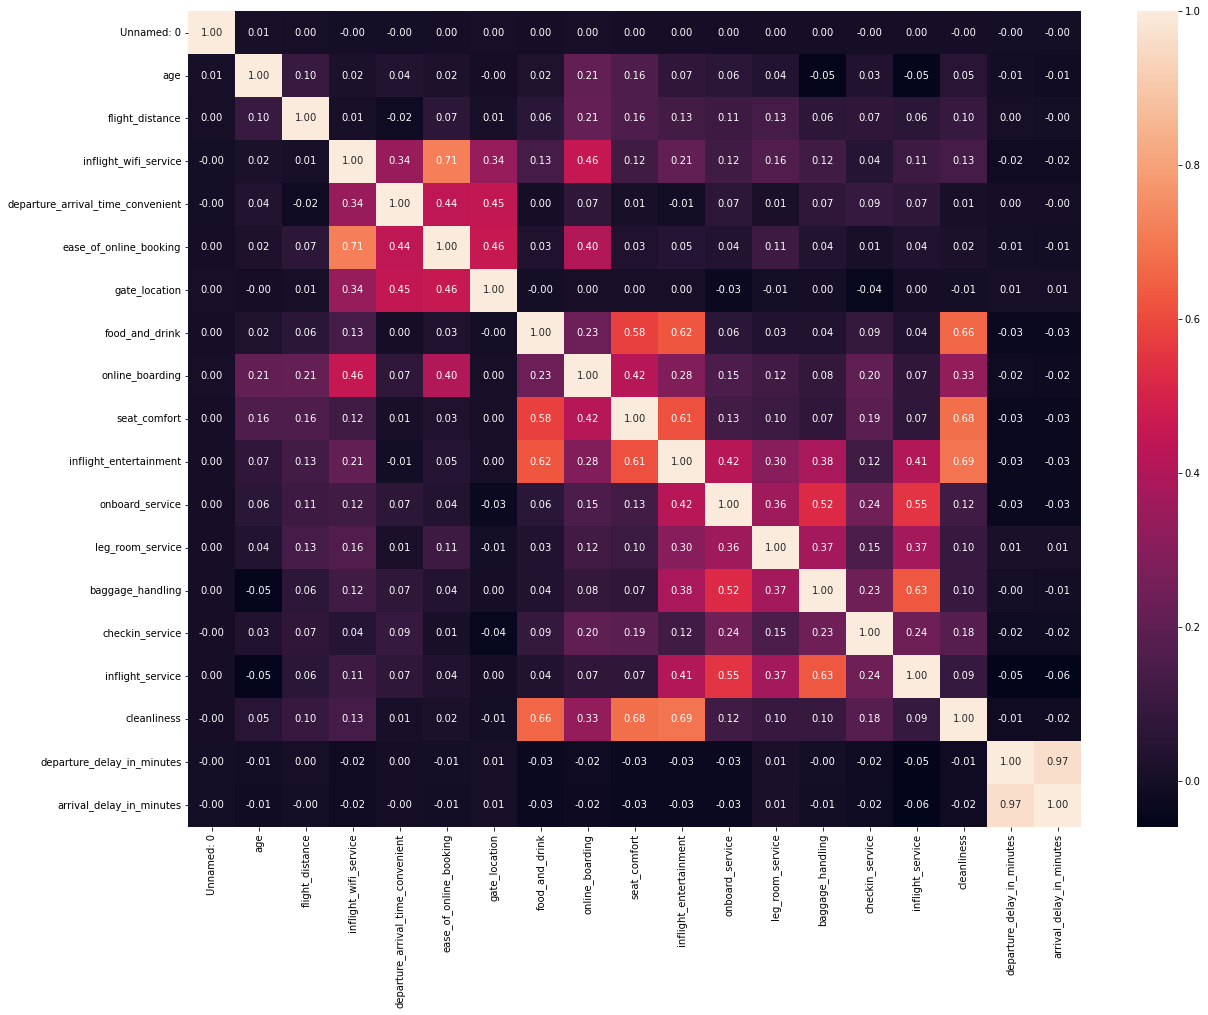

In [42]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

In [43]:
#Encoding and missing value handling for feature importance
cat = ['Gender','customer_type','type_of_travel','customer_class']
y_cat = y_train.copy()
num = ['Unnamed: 0','age','flight_distance', 'inflight_wifi_service','departure_arrival_time_convenient', 'ease_of_online_booking','gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort','inflight_entertainment', 'onboard_service', 'leg_room_service','baggage_handling', 'checkin_service', 'inflight_service','cleanliness', 'departure_delay_in_minutes','arrival_delay_in_minutes']

X_feat_imp_cat = X_train[cat]
X_feat_imp_cat.reset_index(drop=True, inplace=True)
X_feat_imp_num = X_train[num]

#fit encoder
encoder = OrdinalEncoder()
encoder.fit(pd.DataFrame(X_feat_imp_cat))
lencoder = LabelEncoder()
lencoder.fit(y_cat)

#transform dataset using encoder
X_feat_imp_cat_enc = encoder.transform(pd.DataFrame(X_feat_imp_cat))
y_cat = lencoder.transform(y_cat)

# Create DataFrame
X_cat_enc_df = pd.DataFrame(X_feat_imp_cat_enc, columns=['Gender','customer_type','type_of_travel','customer_class'])
y_cat_df = pd.DataFrame(y_cat, columns=['satisfaction'])

#concat 2 df
X_feat_imp_num.reset_index(drop = True, inplace=True)
X_feat_imp = pd.concat([X_feat_imp_num, X_cat_enc_df], axis=1)

In [44]:
#Drop NaN
X_nan = X_feat_imp [(X_feat_imp['arrival_delay_in_minutes'].isna())]
nan_index = X_nan.index

X_feat_imp.drop(index=X_nan.index, inplace = True)
y_cat_df.drop(index=X_nan.index, inplace = True)

In [45]:
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(n_estimators= 100, random_state=15)

#fit to the data
featimpt.fit(X_feat_imp ,y_cat_df)

#save result and convert to dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_feat_imp.columns)
scorepercolumn.sort_values(ascending=False)

C:\Users\SBD-HP\AppData\Local\Temp\ipykernel_14756\442508384.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  featimpt.fit(X_feat_imp ,y_cat_df)


inflight_wifi_service                0.159137
online_boarding                      0.153553
customer_class                       0.106690
type_of_travel                       0.090176
inflight_entertainment               0.055420
leg_room_service                     0.040789
seat_comfort                         0.038336
flight_distance                      0.037346
ease_of_online_booking               0.035762
customer_type                        0.035684
age                                  0.030453
onboard_service                      0.028761
cleanliness                          0.025131
inflight_service                     0.024003
baggage_handling                     0.023644
checkin_service                      0.023581
Unnamed: 0                           0.019100
departure_arrival_time_convenient    0.017705
gate_location                        0.017656
food_and_drink                       0.011765
arrival_delay_in_minutes             0.011187
departure_delay_in_minutes        

Dari urgensi fitur di bawah ini, fitur yang diambil adalah yang memiliki urgensi lebih dari 0,02 (ditambah food_and_drink). Karena semua fitur di bawah threshold diketahui tidak akan mempengaruhi kepuasan.

In [46]:
#Keep only features that selected from previous analyzation
selected_feat= ['inflight_wifi_service','online_boarding','customer_class','type_of_travel','inflight_entertainment','leg_room_service','seat_comfort','flight_distance','ease_of_online_booking','customer_type','age','onboard_service','cleanliness','inflight_service','baggage_handling','checkin_service','food_and_drink']
X_train_fs = X_train[selected_feat]
X_test_fs = X_test[selected_feat]
X_test_fs.head(5)

,inflight_wifi_service,online_boarding,customer_class,type_of_travel,inflight_entertainment,leg_room_service,seat_comfort,flight_distance,ease_of_online_booking,customer_type,age,onboard_service,cleanliness,inflight_service,baggage_handling,checkin_service,food_and_drink
24067,5,5,Business,Business travel,4,4,4,373,5,Loyal Customer,37,4,2,4,4,1,4
3622,5,5,Business,Business travel,5,5,5,1623,3,Loyal Customer,56,5,4,5,5,3,4
23162,5,1,Business,Business travel,4,4,2,1676,5,Loyal Customer,41,4,3,4,4,3,3
80627,0,2,Business,Business travel,4,4,3,2993,0,Loyal Customer,50,4,3,4,4,1,1
50139,1,4,Business,Business travel,2,2,4,2149,1,Loyal Customer,43,2,4,2,2,5,5


## Missing value handling

In [47]:
# Looking missing value in X_train
X_train_fs.isnull().sum().sum()

0

In [48]:
# Looking missing value in X_test
X_test_fs.isnull().sum().sum()

0

In [49]:
# Looking missing value in y_train
y_train.isnull().sum().sum()

0

In [50]:
# Looking missing value in y_test
y_test.isnull().sum().sum()

0

There is no missing value in both X and y dataset. Continue with other preprocessing.

## Split between Numerical Columns and Categorical Columns

Pemisahan data antara numerik dan kategorikal dilakukan sebelum penanganan outlier untuk memudahkan penanganan outlier dan pembuatan grafik.

In [51]:
X_train_fs

,inflight_wifi_service,online_boarding,customer_class,type_of_travel,inflight_entertainment,leg_room_service,seat_comfort,flight_distance,ease_of_online_booking,customer_type,age,onboard_service,cleanliness,inflight_service,baggage_handling,checkin_service,food_and_drink
82098,2,2,Eco,Business travel,4,3,4,539,2,disloyal Customer,26,2,4,2,2,1,4
15128,5,5,Eco,Personal Travel,1,5,4,859,5,Loyal Customer,46,1,3,1,1,5,2
65490,2,2,Eco,Business travel,5,5,2,192,2,disloyal Customer,18,3,5,5,5,4,5
93473,4,2,Eco,Business travel,3,3,2,1140,4,disloyal Customer,24,2,2,4,4,2,4
27114,3,3,Business,Business travel,1,2,1,862,3,disloyal Customer,30,4,1,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49015,4,2,Eco,Personal Travel,1,4,3,1107,4,Loyal Customer,55,1,2,1,1,3,3
68229,2,5,Business,Business travel,4,4,5,1089,2,Loyal Customer,50,4,5,4,4,5,2
8076,3,3,Eco,Business travel,3,1,2,300,3,disloyal Customer,39,4,3,2,1,4,3
52981,4,3,Eco,Personal Travel,1,4,3,1089,4,Loyal Customer,61,1,1,1,1,5,1


In [52]:
#choosing numerical and categorical column
num_col = ['flight_distance','age']
cat_col = ['inflight_wifi_service','online_boarding','inflight_entertainment','leg_room_service','seat_comfort','ease_of_online_booking','onboard_service', 'cleanliness','inflight_service', 'baggage_handling', 'checkin_service','food_and_drink','customer_class','type_of_travel', 'customer_type']

Semua kolom merupakan numerical data, sehingga tidak ada categori pada data ini. Lanjutkan sesuai prosedur numerical.

In [53]:
# Split data set based on categorical dan numerical
X_train_num = X_train_fs[num_col]
X_train_cat = X_train_fs[cat_col]

X_test_num = X_test_fs[num_col]
X_test_cat = X_test_fs[cat_col]

In [54]:
#show Xtrain cat
X_train_cat.head(3)

,inflight_wifi_service,online_boarding,inflight_entertainment,leg_room_service,seat_comfort,ease_of_online_booking,onboard_service,cleanliness,inflight_service,baggage_handling,checkin_service,food_and_drink,customer_class,type_of_travel,customer_type
82098,2,2,4,3,4,2,2,4,2,2,1,4,Eco,Business travel,disloyal Customer
15128,5,5,1,5,4,5,1,3,1,1,5,2,Eco,Personal Travel,Loyal Customer
65490,2,2,5,5,2,2,3,5,5,5,4,5,Eco,Business travel,disloyal Customer


In [55]:
#show Xtrain num
X_train_num.head(3)

,flight_distance,age
82098,539,26
15128,859,46
65490,192,18


## Outliers handling

In [56]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable)
    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

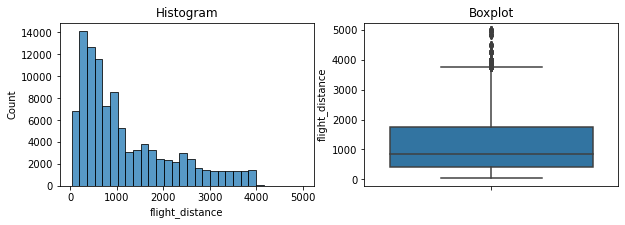

flight_distance
skewness: 1.1073818061471663
the distribution is skewed


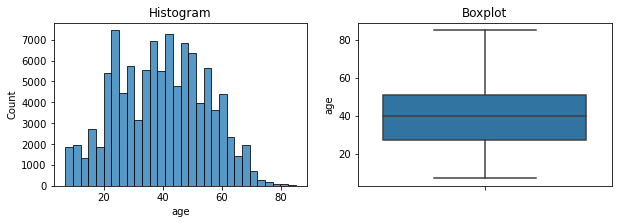

age
skewness: -0.0019120260124434333
the distribution is normal


In [57]:
#show histogram and boxplot for all the two features in X_train num
for i in X_train_num.columns:
    hist_boxplot(X_train_num, i)

umur terdistribusi normal, jarak terbang skewed dengan outlier. Namun outlier ini didefinisikan sebagai outlier alami karena terdapat penerbangan dengan jarak yang sangat jauh

## Feature Scaling

Scaling akan dilakukan dengan minmaxscaler untuk jarak terbang dan scaler standar untuk umur dengan pipeline.

## Feature Encoding

Encoding will be done in pipeline with this assignment of encoding:

OrdinalEncoder: 'customer_class','type_of_travel','customer_type'

Not doing encoding (passthrough) beacuse it is already in numeric: 'inflight_wifi_service', 'online_boarding', 'inflight_entertainment','leg_room_service', 'seat_comfort', 'ease_of_online_booking', 'onboard_service', 'cleanliness', 'inflight_service','baggage_handling', 'checkin_service', 'food_and_drink'

Encoding by label encoder is done to y test and y train, because the y dataset is using category: 'satisfied' and 'neutral or dissatisfied'

In [58]:
y_train

82098    neutral or dissatisfied
15128                  satisfied
65490    neutral or dissatisfied
93473                  satisfied
27114    neutral or dissatisfied
                  ...           
49015    neutral or dissatisfied
68229                  satisfied
8076     neutral or dissatisfied
52981    neutral or dissatisfied
7624                   satisfied
Name: satisfaction, Length: 103880, dtype: object

In [59]:
#label encoder for y dataset
labelencoder = LabelEncoder()
labelencoder.fit(y_train)

y_train_enc = labelencoder.transform(y_train)
y_train_enc = pd.DataFrame(y_train_enc, columns=['satisfaction'])

y_test_enc = labelencoder.transform(y_test)
y_test_enc = pd.DataFrame(y_test_enc, columns=['satisfaction'])


## Concate between Numerical Columns and Categorical Columns

In [60]:
#concat 2 dataframe 
X_train_fin = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_fin = pd.concat([X_test_num, X_test_cat], axis=1)
X_test_fin

,flight_distance,age,inflight_wifi_service,online_boarding,inflight_entertainment,leg_room_service,seat_comfort,ease_of_online_booking,onboard_service,cleanliness,inflight_service,baggage_handling,checkin_service,food_and_drink,customer_class,type_of_travel,customer_type
24067,373,37,5,5,4,4,4,5,4,2,4,4,1,4,Business,Business travel,Loyal Customer
3622,1623,56,5,5,5,5,5,3,5,4,5,5,3,4,Business,Business travel,Loyal Customer
23162,1676,41,5,1,4,4,2,5,4,3,4,4,3,3,Business,Business travel,Loyal Customer
80627,2993,50,0,2,4,4,3,0,4,3,4,4,1,1,Business,Business travel,Loyal Customer
50139,2149,43,1,4,2,2,4,1,2,4,2,2,5,5,Business,Business travel,Loyal Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123837,536,43,4,3,4,2,4,3,3,4,1,3,4,4,Eco,Business travel,disloyal Customer
41210,1874,54,2,4,2,2,4,3,2,1,2,2,3,1,Eco,Business travel,Loyal Customer
89716,843,66,1,3,1,1,4,4,1,2,1,1,1,2,Business,Business travel,Loyal Customer
102370,612,57,1,1,1,5,1,1,2,1,4,2,3,1,Eco,Personal Travel,Loyal Customer


---
# 6. Model definition

Notes :

Algoritma yang digunakan untuk memprediksi ini adalah:
- Logistic Regression / LogReg
- KNearest Neighbour /KNN
- Naive Bayes /NB 
- Support Vector Classifier/SVC
- Decision Tree/DT
- Bagging Classifier/BC
- Random Forest Clasifier/RFC
- AdaBoost/AB
- GradientBoost/GB
- XGBoostClassfier/XGB

Note: semua model akan menggunakan base parameter, tiga model base paramater terbaik akan dilanjutkan ke pencarian grid dan menemukan parameter terbaik mereka. Evaluasi metrics yang digunakan adalah cross validation score, accuracy_score and classification_report (recall, precision, f1 score and accuracy).

In [61]:
#divide num by skew and normal, cat by ordinal and none
num_skew = ['flight_distance']
num_nom = ['age']
cat_ord = ['customer_class','type_of_travel','customer_type']
cat_none = ['inflight_wifi_service', 'online_boarding', 'inflight_entertainment','leg_room_service', 'seat_comfort', 'ease_of_online_booking', 'onboard_service', 'cleanliness', 'inflight_service','baggage_handling', 'checkin_service', 'food_and_drink']

In [62]:
#column transformer for each of the column category
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skew),
    ('numnom', StandardScaler(),num_nom),
    ('catord', OrdinalEncoder(),cat_ord),
    ('catnone', 'passthrough',cat_none)
])

In [63]:
#pipeline for Logistic Regression
prepmod_LR = Pipeline([
    ('preprop', preprocess),
    ('LR', LogisticRegression())
    ])

In [64]:
#pipeline for KNN
prepmod_KNN = Pipeline([
    ('preprop', preprocess),
    ('KNN', KNeighborsClassifier())
    ])

In [65]:
#pipeline for Naive 
prepmod_NB = Pipeline([
    ('preprop', preprocess),
    ('NB', GaussianNB())
    ])

In [66]:
#pipeline for SVC
prepmod_SVC = Pipeline([
    ('preprop', preprocess),
    ('SVC', SVC())
    ])

In [67]:
#pipeline for DT
prepmod_DT = Pipeline([
    ('preprop', preprocess),
    ('DT', DecisionTreeClassifier())
    ])

In [68]:
#pipeline for BC
prepmod_BC = Pipeline([
    ('preprop', preprocess),
    ('BC', BaggingClassifier())
    ])

In [69]:
#pipeline for RFC
prepmod_RFC = Pipeline([
    ('preprop', preprocess),
    ('RFC', RandomForestClassifier())
    ])

In [70]:
#pipeline for AdaBoostClassifier
prepmod_AB = Pipeline([
    ('preprop', preprocess),
    ('AB', AdaBoostClassifier())
    ])

In [71]:
#pipeline for GradientBoostClassifier
prepmod_GB = Pipeline([
    ('preprop', preprocess),
    ('GB', GradientBoostingClassifier())
    ])

In [72]:
#pipeline for XGBoostClassfier
prepmod_XGB = Pipeline([
    ('preprop', preprocess),
    ('GB', XGBClassifier())
    ])

---
# 7. Model Training

Model training akan dilakukan sekalian dengan grid search.

---
# 8. Model Evaluation

In [73]:
#Turn off the warnings
warnings.filterwarnings('ignore')

In [74]:
#dataframe for the evaluation results
resulteval = pd.DataFrame(('LogisticRegression','KNeighborsClassifier','GaussianNB','SVC','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostClassifier','XGBoostClassfier'))
resulteval.rename(columns ={0:'model'},inplace=True)
resulteval['mean']=[0,0,0,0,0,0,0,0,0,0]
resulteval['stddev']=[0,0,0,0,0,0,0,0,0,0]
resulteval['acc_train']=[0,0,0,0,0,0,0,0,0,0]
resulteval['acc_test']=[0,0,0,0,0,0,0,0,0,0]
resulteval['train-test']=[0,0,0,0,0,0,0,0,0,0]
resulteval

,model,mean,stddev,acc_train,acc_test,train-test
0,LogisticRegression,0,0,0,0,0
1,KNeighborsClassifier,0,0,0,0,0
2,GaussianNB,0,0,0,0,0
3,SVC,0,0,0,0,0
4,DecisionTreeClassifier,0,0,0,0,0
5,BaggingClassifier,0,0,0,0,0
6,RandomForestClassifier,0,0,0,0,0
7,AdaBoostClassifier,0,0,0,0,0
8,GradientBoostClassifier,0,0,0,0,0
9,XGBoostClassfier,0,0,0,0,0


### Logistic regression

In [75]:
#Do evaluation for LR
model = prepmod_LR
i = 0
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### KNeighborsClassifier

In [76]:
#Do evaluation for KNN
model = prepmod_KNN
i = 1
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### GaussianNB

In [77]:
#Do evaluation for NB
model = prepmod_NB
i = 2
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### SVC

In [78]:
#Do evaluation for SVC
model = prepmod_SVC
i = 3
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### Decision Tree

In [79]:
#Do evaluation for DT
model = prepmod_DT
i = 4
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### BaggingClassifier

In [80]:
#Do evaluation for BC
model = prepmod_BC
i = 5
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### Random forest

In [81]:
#Do evaluation for RFC
model = prepmod_RFC
i = 6
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### ADA Boost

In [82]:
#Do evaluation for AB
model = prepmod_AB
i = 7
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### GradientBoost

In [83]:
#Do evaluation for GB
model = prepmod_GB
i = 8
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

### XGBoostClassfier

In [84]:
#Do evaluation for XGB
model = prepmod_XGB
i = 9
a = np.mean(cross_val_score(model,X_train_fin,y_train_enc,cv=10))
b = np.std(cross_val_score(model,X_train_fin,y_train,cv=10))

model.fit(X_train_fin,y_train_enc)
train_acc = accuracy_score(y_train_enc,model.predict(X_train_fin))
test_acc = accuracy_score(y_test_enc,model.predict(X_test_fin))

resulteval.loc[i,'mean']=a
resulteval.loc[i,'stddev']=b
resulteval.loc[i,'acc_train']=train_acc
resulteval.loc[i,'acc_test']=test_acc
resulteval.loc[i,'train-test']=abs(train_acc-test_acc)

In [85]:
resulteval.sort_values(by='mean', ascending = False)

,model,mean,stddev,acc_train,acc_test,train-test
9,XGBoostClassfier,0.962813,NaN,0.972796,0.963111,0.009684
6,RandomForestClassifier,0.962668,0.002282,0.999981,0.962380,0.037601
5,BaggingClassifier,0.958192,0.001721,0.996352,0.958028,0.038323
3,SVC,0.944349,0.002808,0.945735,0.945899,0.000164
4,DecisionTreeClassifier,0.943964,0.001990,1.000000,0.946246,0.053754
8,GradientBoostClassifier,0.941278,0.002430,0.942222,0.943242,0.001020
1,KNeighborsClassifier,0.934771,0.002251,0.954861,0.936658,0.018204
7,AdaBoostClassifier,0.923787,0.002768,0.924037,0.925183,0.001146
0,LogisticRegression,0.872449,0.002588,0.872468,0.875010,0.002541
2,GaussianNB,0.865932,0.003380,0.865951,0.865345,0.000606


Dari tabel di atas, model yang akan dilanjutkan untuk pencarian grid ada tiga yang memiliki mean tinggi, standar deviasi rendah. perbedaan train-test yang rendah. Rata-rata tertinggi diperoleh oleh XGBoostClassfier, Random Forest Classifier dan Bagging Classifier, tetapi ketiganya memiliki perbedaan train-test yang tinggi, model mungkin tidak robust. Oleh karena itu, model yang diambil adalah yang memiliki train-test terkecil yaitu SVC, GradientBoostClassifier dan AdaBoostClassifier.

### SVC Base vs Best

In [86]:
#parameter grid for SVC
param_gridSVC = [{'SVC__C': [1.0,5.0],
               'SVC__kernel': ['linear','poly','rbf'],
               'SVC__max_iter': [500,750,1000],
               'SVC__random_state': [15,25,35]}]

In [87]:
#grid search and then fit
gridSVC = GridSearchCV(prepmod_SVC, param_gridSVC, cv=5)
gridSVC.fit(X_train_fin,y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['flight_distance']),
                                                                        ('numnom',
                                                                         StandardScaler(),
                                                                         ['age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['customer_class',
                                                                          'type_of_travel',
                                               

In [88]:
#find best estimator for SVC
print("Best estimator:\n{}".format(gridSVC.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['flight_distance']),
                                                 ('numnom', StandardScaler(),
                                                  ['age']),
                                                 ('catord', OrdinalEncoder(),
                                                  ['customer_class',
                                                   'type_of_travel',
                                                   'customer_type']),
                                                 ('catnone', 'passthrough',
                                                  ['inflight_wifi_service',
                                                   'online_boarding',
                                                   'inflight_entertainment',
                                                   'leg_room_service',
             

In [89]:
#print best parameter
print("Best parameters: {}".format(gridSVC.best_params_))

Best parameters: {'SVC__C': 1.0, 'SVC__kernel': 'rbf', 'SVC__max_iter': 500, 'SVC__random_state': 15}


the best parameter of SVC model:'SVC__C': 1.0, 'SVC__kernel': 'rbf', 'SVC__max_iter': 500, 'SVC__random_state': 15

In [90]:
#print grid score
print("Test-set score: {:.2f}".format(gridSVC.score(X_train_fin,y_train_enc)))

Test-set score: 0.67


In [91]:
#predict by best parameter
y_train_predSVC = gridSVC.best_estimator_.predict(X_train_fin)
y_test_predSVC = gridSVC.best_estimator_.predict(X_test_fin)

In [92]:
#predict by base parameter
y_train_pred_baseSVC = prepmod_SVC.predict(X_train_fin)
y_test_pred_baseSVC = prepmod_SVC.predict(X_test_fin)

In [93]:
#print accuracy score best param
print('accuracy score train : ',accuracy_score(y_train_enc,y_train_predSVC))
print('accuracy score test : ',accuracy_score(y_test_enc,y_test_predSVC))

accuracy score train :  0.6716114747785907
accuracy score test :  0.6731998459761263


In [94]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train_enc,y_train_pred_baseSVC))
print('accuracy score test : ',accuracy_score(y_test_enc,y_test_pred_baseSVC))

accuracy score train :  0.9457354639969195
accuracy score test :  0.9458991143627262


Dari nilai akurasi diketahui bahwa best parameter dan base parameter SVC merupakan parameter robust dengan selisih yang sangat rendah antara test dan train. Tetapi base parameter memiliki kinerja yang jauh lebih baik dari pada best parameter (best parameter bahkan underfit), lanjutkan ke classification report

In [95]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_predSVC))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_predSVC))

-----------train-------------
              precision    recall  f1-score   support

           0       0.91      0.47      0.62     58683
           1       0.58      0.94      0.71     45197

    accuracy                           0.67    103880
   macro avg       0.74      0.70      0.66    103880
weighted avg       0.76      0.67      0.66    103880

-----------test-------------
              precision    recall  f1-score   support

           0       0.91      0.47      0.62     14753
           1       0.57      0.94      0.71     11217

    accuracy                           0.67     25970
   macro avg       0.74      0.71      0.67     25970
weighted avg       0.77      0.67      0.66     25970



In [96]:
#print classification report base param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_pred_baseSVC))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_pred_baseSVC))


-----------train-------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     58683
           1       0.95      0.93      0.94     45197

    accuracy                           0.95    103880
   macro avg       0.95      0.94      0.94    103880
weighted avg       0.95      0.95      0.95    103880

-----------test-------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14753
           1       0.95      0.92      0.94     11217

    accuracy                           0.95     25970
   macro avg       0.95      0.94      0.94     25970
weighted avg       0.95      0.95      0.95     25970



Dari classification report terlihat pada recall baris pertama (kita ingin melihat berapa banyak prediksi pelanggan yang  really dissatisfied, untuk mengetahui faktor-faktor yang menyebabkan pelanggan unsatisfied). Best parameter memiliki kinerja yang sangat rendah atau underfit, tetapi base parameter memiliki kinerja tinggi dan good fit. Skor akurasi juga menunjukkan bahwa base model lebih baik dari best parameter. Oleh karena itu lanjutkan ke inferensi menggunakan base parameter model.

### AdaBoost Base vs Best

In [97]:
#grid parameters for logistic regression
param_gridAB = [{'AB__n_estimators': [100,150,200],
               'AB__learning_rate': [0.1, 0.5, 0.7, 1.0],
               'AB__random_state': [15,25,35]}]

In [98]:
#do grid search and fit
gridAB = GridSearchCV(prepmod_AB, param_gridAB, cv=5)
gridAB.fit(X_train_fin,y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['flight_distance']),
                                                                        ('numnom',
                                                                         StandardScaler(),
                                                                         ['age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['customer_class',
                                                                          'type_of_travel',
                                               

In [99]:
#find best estimator
print("Best estimator:\n{}".format(gridAB.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['flight_distance']),
                                                 ('numnom', StandardScaler(),
                                                  ['age']),
                                                 ('catord', OrdinalEncoder(),
                                                  ['customer_class',
                                                   'type_of_travel',
                                                   'customer_type']),
                                                 ('catnone', 'passthrough',
                                                  ['inflight_wifi_service',
                                                   'online_boarding',
                                                   'inflight_entertainment',
                                                   'leg_room_service',
             

In [100]:
#print best paramaters
print("Best parameters: {}".format(gridAB.best_params_))

Best parameters: {'AB__learning_rate': 0.7, 'AB__n_estimators': 200, 'AB__random_state': 15}


the best parameter of AB model:'AB__learning_rate': 0.7, 'AB__n_estimators': 200, 'AB__random_state': 15

In [101]:
#print grid score
print("Test-set score: {:.2f}".format(gridAB.score(X_train_fin,y_train_enc)))

Test-set score: 0.93


In [102]:
#predict by best parameter
y_train_predAB = gridAB.best_estimator_.predict(X_train_fin)
y_test_predAB = gridAB.best_estimator_.predict(X_test_fin)

In [103]:
#predict by base parameter
y_train_pred_baseAB = prepmod_AB.predict(X_train_fin)
y_test_pred_baseAB = prepmod_AB.predict(X_test_fin)

#### Comparison between test and train

In [104]:
#print accuracy score best param
print('accuracy score train : ',accuracy_score(y_train_enc,y_train_predAB))
print('accuracy score test : ',accuracy_score(y_test_enc,y_test_predAB))

accuracy score train :  0.9268001540238737
accuracy score test :  0.9263765883711975


In [105]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train_enc,y_train_pred_baseAB))
print('accuracy score test : ',accuracy_score(y_test_enc,y_test_pred_baseAB))

accuracy score train :  0.9240373507893723
accuracy score test :  0.9251829033500193


Dari nilai akurasi diketahui bahwa best parameter dan base AdaBoost merupakan parameter robust dengan selisih yang sangat rendah antara test dan train. Kita perlu membandingkannya dengan metrik lain

In [106]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_predAB))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_predAB))

-----------train-------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     58683
           1       0.92      0.91      0.92     45197

    accuracy                           0.93    103880
   macro avg       0.93      0.92      0.93    103880
weighted avg       0.93      0.93      0.93    103880

-----------test-------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14753
           1       0.92      0.90      0.91     11217

    accuracy                           0.93     25970
   macro avg       0.93      0.92      0.92     25970
weighted avg       0.93      0.93      0.93     25970



In [107]:
#print classification report base param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_pred_baseAB))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_pred_baseAB))

-----------train-------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     58683
           1       0.92      0.90      0.91     45197

    accuracy                           0.92    103880
   macro avg       0.92      0.92      0.92    103880
weighted avg       0.92      0.92      0.92    103880

-----------test-------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14753
           1       0.92      0.90      0.91     11217

    accuracy                           0.93     25970
   macro avg       0.93      0.92      0.92     25970
weighted avg       0.93      0.93      0.93     25970



Dari classification report terlihat pada recall baris pertama (kita ingin melihat berapa banyak prediksi pelanggan yang  really dissatisfied, untuk mengetahui faktor-faktor yang menyebabkan pelanggan unsatisfied). Recall best dan base sama dengan 0.94 poin, oleh karena itu kita mengacu pada nilai akurasi dimana nilai akurasi terbaik diperoleh dengan best parameter dengan perbedaan yang sangat rendah antara train dan test untuk melanjutkan data inferensi.

### Gradient Boost Base vs Best

In [108]:
#grid parameters for Gradient Boosting
param_gridGB = [{'GB__n_estimators': [50,100],
               'GB__min_samples_split': [1, 2],
               'GB__min_samples_leaf': [1, 2],
               'GB__max_depth': [1, 2],
               'GB__random_state': [15,25,35]}]

In [109]:
#do grid search and fit
gridGB = GridSearchCV(prepmod_GB, param_gridGB, cv=5)
gridGB.fit(X_train_fin,y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['flight_distance']),
                                                                        ('numnom',
                                                                         StandardScaler(),
                                                                         ['age']),
                                                                        ('catord',
                                                                         OrdinalEncoder(),
                                                                         ['customer_class',
                                                                          'type_of_travel',
                                               

In [110]:
#find best estimator
print("Best estimator:\n{}".format(gridGB.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['flight_distance']),
                                                 ('numnom', StandardScaler(),
                                                  ['age']),
                                                 ('catord', OrdinalEncoder(),
                                                  ['customer_class',
                                                   'type_of_travel',
                                                   'customer_type']),
                                                 ('catnone', 'passthrough',
                                                  ['inflight_wifi_service',
                                                   'online_boarding',
                                                   'inflight_entertainment',
                                                   'leg_room_service',
             

In [111]:
#print best paramaters of Gradient Boosting
print("Best parameters: {}".format(gridGB.best_params_))

Best parameters: {'GB__max_depth': 2, 'GB__min_samples_leaf': 1, 'GB__min_samples_split': 2, 'GB__n_estimators': 100, 'GB__random_state': 15}


the best parameter of AB model:'GB__max_depth': 2, 'GB__min_samples_leaf': 1, 'GB__min_samples_split': 2, 'GB__n_estimators': 100, 'GB__random_state': 15

In [112]:
#print grid score
print("Test-set score: {:.2f}".format(gridGB.score(X_train_fin,y_train_enc)))

Test-set score: 0.93


In [113]:
#predict by best parameter
y_train_predGB = gridGB.best_estimator_.predict(X_train_fin)
y_test_predGB = gridGB.best_estimator_.predict(X_test_fin)

In [114]:
#predict by base parameter
y_train_pred_baseGB = prepmod_GB.predict(X_train_fin)
y_test_pred_baseGB = prepmod_GB.predict(X_test_fin)

In [115]:
#print accuracy score best param
print('accuracy score train : ',accuracy_score(y_train_enc,y_train_predGB))
print('accuracy score test : ',accuracy_score(y_test_enc,y_test_predGB))

accuracy score train :  0.933249903735079
accuracy score test :  0.9350404312668463


In [116]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train_enc,y_train_pred_baseGB))
print('accuracy score test : ',accuracy_score(y_test_enc,y_test_pred_baseGB))

accuracy score train :  0.9422217943781286
accuracy score test :  0.9432422025413939


Dari nilai akurasi diketahui bahwa kedua best dan base parameter dari Gradient Boost adalah parameter yangrobust dengan perbedaan yang sangat rendah antara test and trainn. Tetapi base memiliki kinerja yang lebih baik. Selanjutnya perlu membandingkannya lebih banyak dengan metrik lainnya

In [117]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_predGB))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_predGB))

-----------train-------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     58683
           1       0.93      0.91      0.92     45197

    accuracy                           0.93    103880
   macro avg       0.93      0.93      0.93    103880
weighted avg       0.93      0.93      0.93    103880

-----------test-------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14753
           1       0.94      0.91      0.92     11217

    accuracy                           0.94     25970
   macro avg       0.94      0.93      0.93     25970
weighted avg       0.94      0.94      0.93     25970



In [118]:
#print classification report base param
print('-----------train-------------')
print(classification_report(y_train_enc,y_train_pred_baseGB))
print('-----------test-------------')
print(classification_report(y_test_enc,y_test_pred_baseGB))

-----------train-------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     58683
           1       0.95      0.92      0.93     45197

    accuracy                           0.94    103880
   macro avg       0.94      0.94      0.94    103880
weighted avg       0.94      0.94      0.94    103880

-----------test-------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14753
           1       0.95      0.92      0.93     11217

    accuracy                           0.94     25970
   macro avg       0.94      0.94      0.94     25970
weighted avg       0.94      0.94      0.94     25970



Dari classification report terlihat pada recall baris pertama (kita ingin melihat berapa banyak prediksi pelanggan yang  really dissatisfied, untuk mengetahui faktor-faktor yang menyebabkan pelanggan unsatisfied). Recall best dan base sama pada train dan testnya sama, dengan base parameter memiliki nilai recall yang lebih baik daripada best parameter. Oleh karena itu sama dengan skor akurasi, base parameter dipilih untuk melanjutkan data inferensi.

---
# 9. Model Inference

In [119]:
df_inf.head(3)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,125241,Female,Loyal Customer,48,Business travel,Business,928,2,2,1,...,4,4,4,4,5,4,3,26,23.0,satisfied
1,12568,Female,disloyal Customer,23,Business travel,Eco,545,4,5,3,...,2,5,3,5,5,4,2,0,0.0,satisfied
2,24912,Male,Loyal Customer,37,Business travel,Eco,134,1,3,3,...,1,1,4,4,1,4,1,0,0.0,neutral or dissatisfied


In [120]:
df_inf_copy = df_inf.copy()

In [121]:
# Looking missing value in X_train
df_inf_copy.isnull().sum().sum()


0

In [122]:
#predict on infers dataset
y_inf_pred_bestAB = gridAB.best_estimator_.predict(df_inf_copy)

y_inf_pred_baseGB = prepmod_GB.predict(df_inf_copy)

y_inf_pred_baseSVC = prepmod_SVC.predict(df_inf_copy)

In [123]:
y_inf_pred_bestAB = labelencoder.inverse_transform(y_inf_pred_bestAB)
y_inf_pred_baseGB = labelencoder.inverse_transform(y_inf_pred_baseGB)
y_inf_pred_baseSVC = labelencoder.inverse_transform(y_inf_pred_baseSVC)

In [124]:
# Create Dataframe columns=['defpayment_predicted'])
y_inf_pred_best_dfAB= pd.DataFrame(y_inf_pred_bestAB, columns=['satisfaction_AB'])
y_inf_pred_base_dfGB= pd.DataFrame(y_inf_pred_baseGB, columns=['satisfaction_GB'])
y_inf_pred_base_dfSVC= pd.DataFrame(y_inf_pred_baseSVC, columns=['satisfaction_SVC'])

# Concate between Inference-Set and Prediction
df_inf_bestparam = pd.concat([df_inf_copy, y_inf_pred_best_dfAB,y_inf_pred_base_dfGB,y_inf_pred_base_dfSVC], axis=1)
df_inf_bestparam.head(3)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,satisfaction_AB,satisfaction_GB,satisfaction_SVC
0,125241,Female,Loyal Customer,48,Business travel,Business,928,2,2,1,...,4,5,4,3,26,23.0,satisfied,satisfied,satisfied,satisfied
1,12568,Female,disloyal Customer,23,Business travel,Eco,545,4,5,3,...,5,5,4,2,0,0.0,satisfied,neutral or dissatisfied,satisfied,satisfied
2,24912,Male,Loyal Customer,37,Business travel,Eco,134,1,3,3,...,4,1,4,1,0,0.0,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied


In [125]:
#compare prediction result and actual data
df_inf_bestparam[['satisfaction','satisfaction_SVC','satisfaction_AB','satisfaction_GB']]

,satisfaction,satisfaction_SVC,satisfaction_AB,satisfaction_GB
0,satisfied,satisfied,satisfied,satisfied
1,satisfied,satisfied,neutral or dissatisfied,satisfied
2,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied
3,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied
4,satisfied,satisfied,satisfied,satisfied
5,satisfied,satisfied,satisfied,neutral or dissatisfied
6,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied
7,satisfied,satisfied,satisfied,satisfied
8,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied,neutral or dissatisfied
9,satisfied,satisfied,satisfied,satisfied


AdaBoost Classifier dan GradientBosst Classifier memiliki hasil yang sama yaitu 4 dari 30 data salah prediksi. Dengan demikian, akurasi prediksi kedua model adalah 86,67%. Sisi baiknya, SVC dengan hanya 3 data yang salah prediksi dan akurasinya 90%.

---
# 10. Pengambilan Kesimpulan

Kesimpulan:

Dari EDA:
- Data antara target 1 dan target 2 sedikit imbalance (57% vs 43%), imbalance handling (smote) tidak diperlukan..
- Kolom yang dianggap berpotensi mempengaruhi satisfaction adalah : inflight wifi service, online boarding, customer class, type of travel, inflight entertainment, leg room service, seat comfort, flight distance, ease of online booking, customer type, age, onboard service, cleanliness, inflight service, baggage handling, checkin service, food and drink. Kolom lain tidak memiliki potensi.

Dari process feature selection:
- Heatmap: Dari heatmap terlihat ada kolom-kolom yang saling berkorelasi.
- Kepentingan fitur: jika ditambahkanfood and drink, hasilnya sama dengan EDA. Pentingnya fitur ini memberikan validasi untuk EDA.
- Semua fitur yang dinyatakan dalam kesimpulan EDA dipilih sebagai fitur yang dipilih.

Dari missing value and outliers handling:
- There is no missing value pada X and y dataset.
- Kolom Age normal distribusi, dimana flight distance skewed dengan outliers. Tapi outlier ini didefinisikan sebagai outlier alami.
- Scaling akan dilakukan dengan minmaxscaler untuk flight distance dan standard scaller for age dengan pipeline.
- Encoding akan dilakukan oleh ordinal encoder, passthrough untuk dataset, dan label encoder untuk y.

Dari model evaluation and analisis:
- Mean tertinggi diperoleh XGBoost Classifier, Random Forest Classifier and Bagging Classifier,tetapi ketiganya memiliki selisih train dan test yang tinggi.
- Model yang diambil memiliki train-test terkecil yang adalah SVC, GradientBoost Classifier, and AdaBoost Classifier.
- SVC : Base parameter memiliki kinerja yang jauh lebih baik dari pada best parameter (best parameter bahkan underfit), lanjutkan ke inferensi menggunakan model dasar.
- AdaBoost Classifier : Best dan base recall sama dengan 0.94 point, oleh karena itu kita mengacu pada nilai akurasi dimana nilai akurasi terbaik diperoleh dengan best parameter dengan selisih yang sangat rendah antara train dan test untuk melanjutkan data inferensi.
- GradientBoost Classfier: Recall terbaik dan base adalah sama pada train dan testnya sendiri, dengan base parameter memiliki skor recall yang lebih baik dari pada best parameter. Oleh karena itu sama dengan skor akurasi, base parameter dipilih untuk melanjutkan data inferensi.

Dari data inference:
- AdaBoost Classifier dan GradientBosst Classifier mempunyai hasil yang sama dimana 4 of 30 data are mispredicted. Dengan demikian, akurasi prediksi kedua model adalah 86,67%.
- In the better side, SVC dengan hanya 3 data yang salah prediksi dan akurasinya 90%.
- SVC base parameter adalah model terbaik untuk prediksi dataset ini.

Untuk pengembangan selanjutnya dilakukan penyempurnaan model untuk meningkatkan nilai Accuracy Score Train dan Accuracy Score Test dengan :
- Menambahkan fitur lain
- Lakukan nominal encode dan gunakan variabel ordinal untuk ordinalencoder.
- Coba model potensial lainnya.

In [126]:
# save the best pipeline
with open("final_pipe.pkl", "wb") as model_file:
    pickle.dump(prepmod_SVC, model_file)